In [1]:
# Imports
import numpy as np
import tensorflow as tf

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/Applications/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


- **TensorFlow** computations are expressed as stateful dataflow **graphs**
- Everything in Tensorflow takes place in a computational graph and running and evaluating anything in the graph requires a **Session** 

In [2]:
# Tensors: Similar to NumPy ndarray
x = tf.linspace(-1.0, 1.0, 5)
print x # Name of returned tensor is "LinSpace:0"

Tensor("LinSpace:0", shape=(5,), dtype=float32)


In [3]:
# Graphs: Default graph where all current operations have been added
g = tf.get_default_graph()
print g # Check: g.<tab>

In [4]:
# Operations: List of all operations that have been added in graph
[op.name for op in g.get_operations()]

[u'LinSpace/start', u'LinSpace/stop', u'LinSpace/num', u'LinSpace']

In [5]:
# Get output (a tensor) of any operation by asking the graph for the tensor's name
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(5,) dtype=float32>

In [6]:
# Sessions: Session is responsible for evaluating the graph
# 1. Create a session
ses = tf.Session()

# 2. Run session to compute anything created in the tensorflow graph
x_out = ses.run(x)
print x_out

# 3. Alternatively, command the previous tensor to evaluate itself
out_x = x.eval(session=ses)
print out_x

# 4. Close session
ses.close()

[-1.  -0.5  0.   0.5  1. ]
[-1.  -0.5  0.   0.5  1. ]


In [7]:
# Explicitly command the session to manage graph
ses = tf.Session(graph=g)# Default graph is managed if graph not provided
ses.close()

In [8]:
# Create a new graph
new_g = tf.Graph()

In [9]:
# iPython: InteractiveSession
ses = tf.InteractiveSession()
x.eval()

array([-1. , -0.5,  0. ,  0.5,  1. ], dtype=float32)

In [10]:
# Tensor shapes
print x.get_shape()
print x.get_shape().as_list()

(5,)
[5]


In [11]:
# Math Operations
x = tf.linspace(-5.0, 5.0, 64)
mu = 0.0
sigma = 1.0
numerator = tf.exp(tf.neg(tf.pow(x - mu, 2.0)/(2 * tf.pow(sigma, 2.0))))
denominator = sigma * tf.sqrt(2.0 * 22.0/7.0)
z = numerator/denominator
print z.graph
print tf.get_default_graph()

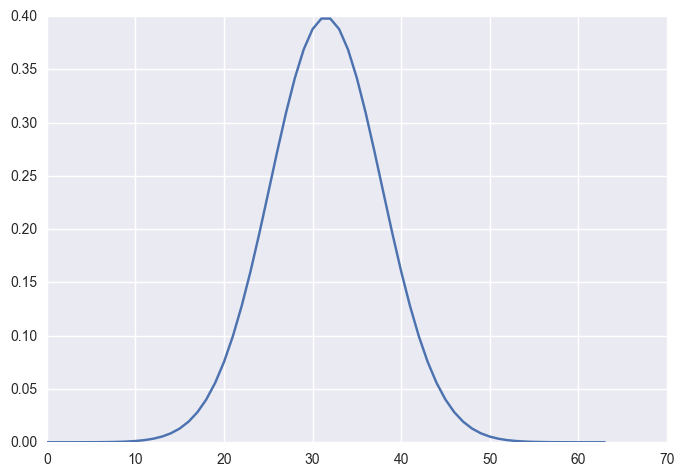

In [12]:
# Evaluate graph and plot the result
z_eval = z.eval()
plt.plot(z_eval)

In [13]:
# Tensor shape not known until comuted in graph
print tf.shape(z).eval()

[64]


In [14]:
# Combine tensors
print tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval()

[[64]
 [64]
 [ 3]
 [ 4]]


In [15]:
# Reshape Tensor
z_reshp = tf.reshape(z, [64, 1])
print z_reshp.get_shape()

(64, 1)


In [16]:
# Transpose Tensor
z_trnsp = tf.transpose(z_reshp)
print z_trnsp.get_shape()

(1, 64)


In [17]:
# Matrix multiplication
z_mtx = tf.matmul(z_reshp, z_trnsp)
print z_mtx.get_shape()
print tf.matmul(z_trnsp, z_reshp).get_shape()

(64, 64)
(1, 1)


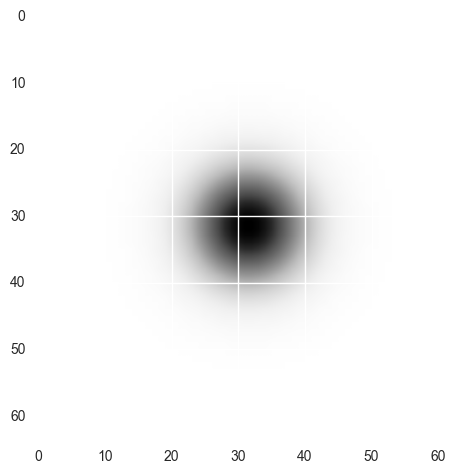

In [18]:
# Evaluate and plot 
z_mtx_eval = z_mtx.eval()
plt.imshow(z_mtx_eval)

In [19]:
# Trial image data
from skimage import data
from skimage import color # Convert RGB to Gray 

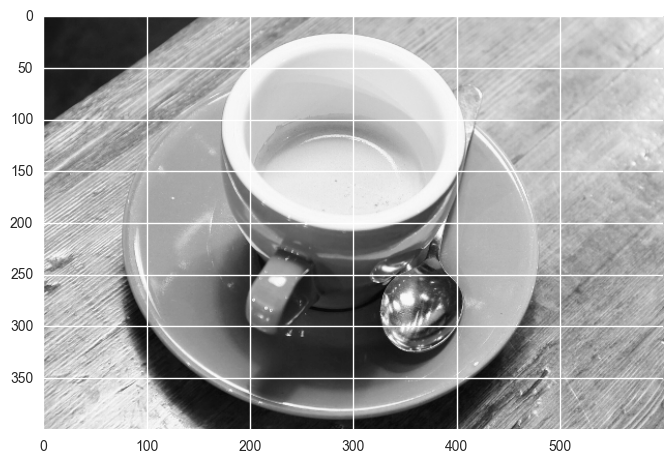

In [20]:
# Plot different color channels
img = np.array(data.coffee())
plt.imshow(img[:, :, 0], cmap='gray')

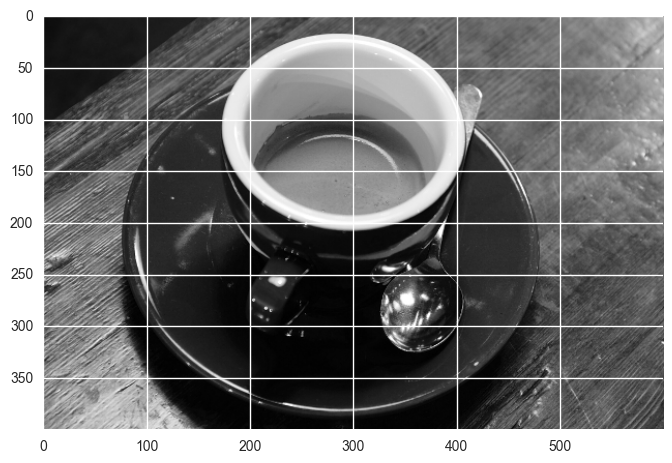

In [21]:
plt.imshow(img[:, :, 1], cmap='gray')

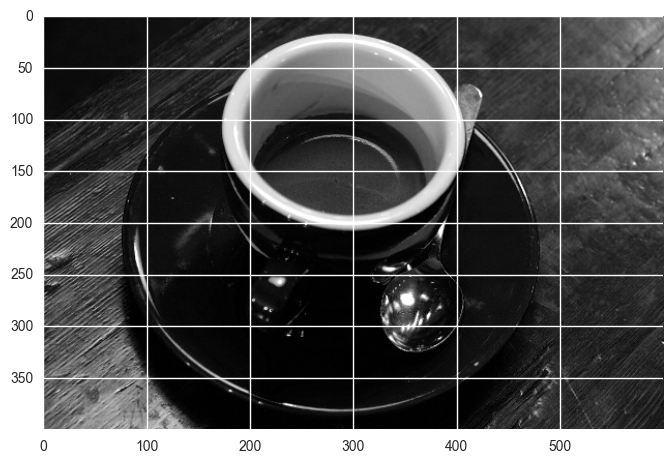

In [22]:
plt.imshow(img[:, :, 2], cmap='gray')

### Convolution
- [Image Kernels](http://setosa.io/ev/image-kernels/)
- Images: TensorFlow reqires images to be  4  dimensional  (N x H x W x C)
-  Image Kernels:  TensorFlow reqires image kernels to be  4  dimensional  (Kernel Height x Kernel Width x Number of Input Channels x Number of Output Channels)
- Padding:  "SAME"  =  "0" padding around the image, "VALID" = no padding
-  Stride:  # Filter  x  W  x  H  x  C

(400, 600)


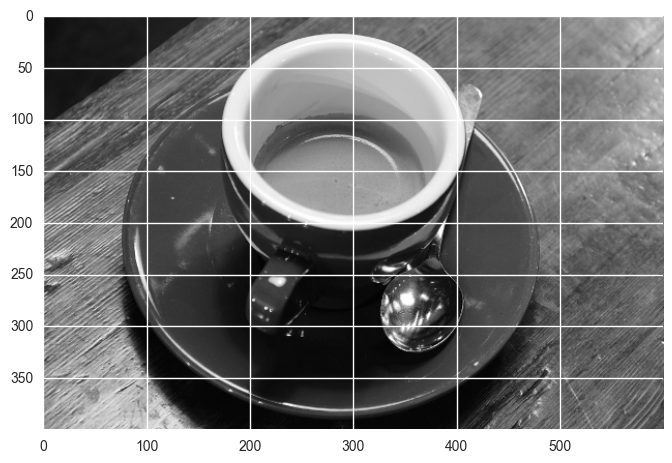

In [23]:
# Change RGB to Gray
img = color.rgb2gray(data.coffee())

plt.imshow(img, cmap='gray')
print img.shape

In [24]:
# Reshape image from 2D to 4D
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print img_4d
print img_4d.get_shape()

# Change type tf.float64 to tf.float32
img_4d32 = tf.cast(img_4d, tf.float32)
print img_4d32

Tensor("Reshape_1:0", shape=(1, 400, 600, 1), dtype=float64)
(1, 400, 600, 1)
Tensor("Cast:0", shape=(1, 400, 600, 1), dtype=float32)


In [25]:
# Reshape image kernel from 2D to 4D
z_4d = tf.reshape(z_mtx, [64, 64, 1, 1])
print z_4d.get_shape()

(64, 64, 1, 1)


In [26]:
# Convolve/Filter an image using a Gaussian Kernel
conv = tf.nn.conv2d(img_4d32, z_4d, strides=[1, 1, 1, 1], padding='SAME')
out = conv.eval()
print out.shape

(1, 400, 600, 1)


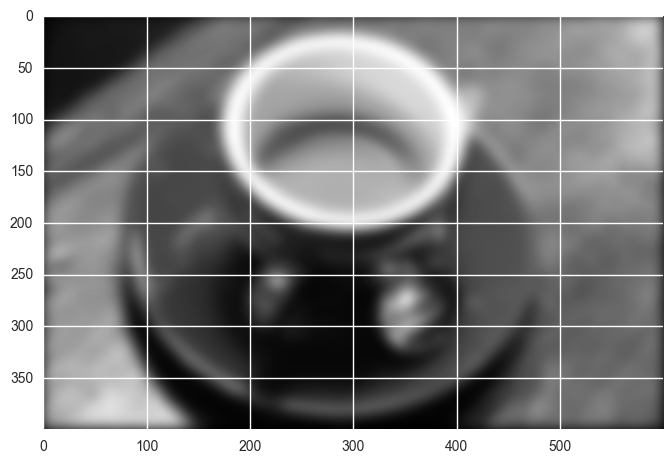

In [27]:
# Matplotlib can not handle plotting 4D images: Convert to original shape
plt.imshow(np.squeeze(out), cmap='gray') # Squeeze out 1D dimension

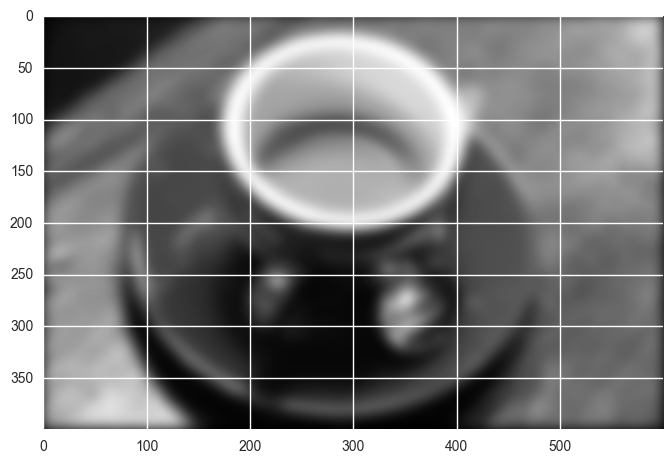

In [28]:
# Extract dimensions to visualize
plt.imshow(out[0, :, :, 0], cmap='gray')

#### Gabor Filter
-  Linear filter for  **edge detection**
-  Gaussian Kernel function modulated by a sinusoidal plane wave

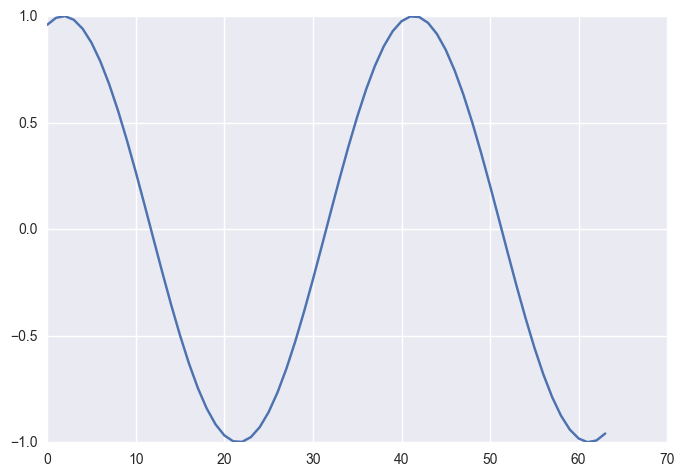

In [29]:
# Sin wave
ksize = 64
xs = tf.linspace(-5.0, 5.0, ksize)
ys = tf.sin(xs)
plt.plot(ys.eval())

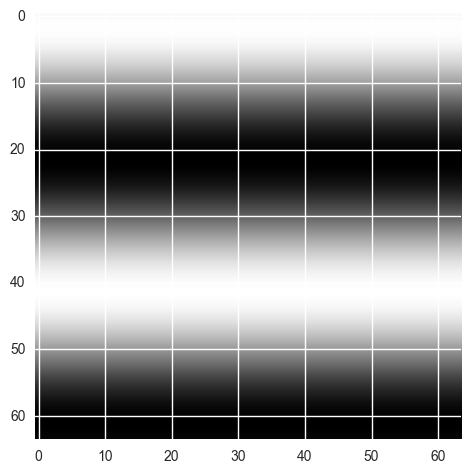

In [30]:
# Sinusoidal plane wave
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones([1, ksize])
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

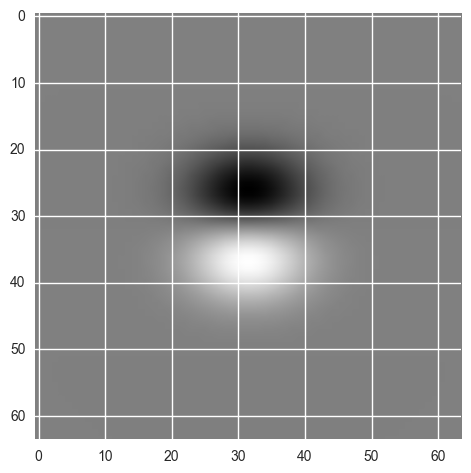

In [31]:
# Gaussian kernel modulated by sinusoidal plane wave
gabor = tf.mul(wave, z_mtx)
plt.imshow(gabor.eval(), cmap='gray')

#### Convolving an image with Gabor filter

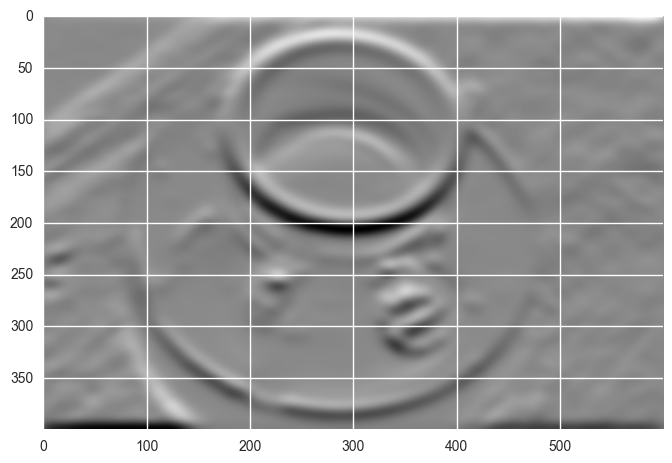

In [32]:
# Reshape Gabor filter from 2D to 4D
gabor_4d = tf.reshape(gabor, [64, 64, 1, 1])
conv = tf.nn.conv2d(img_4d32, gabor_4d, strides=[1, 1, 1, 1], padding='SAME')
out = conv.eval()
plt.imshow(np.squeeze(out), cmap='gray')

####  Placeholder
-  Placeholders are variables which need to be  filled in when  we  are ready to compute the graph

In [33]:
# Create placeholder for image
img = tf.placeholder(tf.float32, shape=[None, None], name='img')
print img

Tensor("img:0", shape=(?, ?), dtype=float32)


In [34]:
# Reshape image to 4D: 2D to 3D to 4D
img_3d = tf.expand_dims(img, dim=2) # Dimension index starts at 0
print img_3d.get_shape()

img_4d = tf.expand_dims(img_3d, dim=0)
print img_4d.get_shape()

(?, ?, 1)
(1, ?, ?, 1)


In [35]:
# Create placeholders for Gabor filter parameters
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [36]:
# Create Gabor filter
x = tf.linspace(-5.0, 5.0, ksize)
numerator = tf.exp(tf.neg(tf.pow(x - mean, 2.0)/(2 * tf.pow(sigma, 2.0))))
denominator = sigma * tf.sqrt(2.0 * 22.0/7.0)
z = numerator/denominator
z_reshp = tf.reshape(z, [ksize, 1])
z_trnsp = tf.transpose(z_reshp)
z_mtx = tf.matmul(z_reshp, z_trnsp)
ys = tf.sin(x)
ys = tf.reshape(ys, tf.pack([ksize, 1]))
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.mul(wave, z_mtx)
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))
print gabor_4d.get_shape()

(?, ?, 1, 1)


In [37]:
# Convolve
conv = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME')
print conv
conv_img = conv[0, :, :, 0]
print conv_img

Tensor("Conv2D_2:0", shape=(1, ?, ?, 1), dtype=float32)
Tensor("strided_slice:0", shape=(?, ?), dtype=float32)


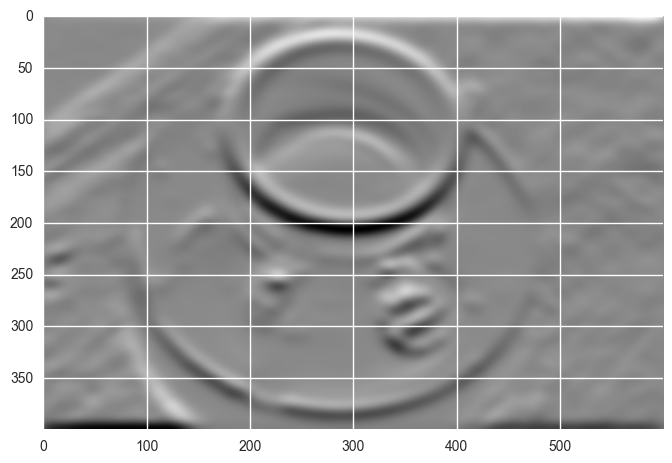

In [38]:
# Feed values for ?, ?
out = conv_img.eval(feed_dict={img: color.rgb2gray(data.coffee()),
                               mean: 0.0,
                               sigma: 1.0,
                               ksize: 64})
plt.imshow(out, cmap='gray')